In [1]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2 (1).csv


In [27]:
import pandas as pd
import numpy as np
import io

#데이터 불러오기
df = pd.read_csv(io.BytesIO(uploaded['vgames2.csv']))
df = df.dropna(axis=0)
df['Year'] = df['Year'].astype(int)

#중복된 게임명 제거
df = df.drop_duplicates(['Name'])
df.iloc[:12]
df.shape

(11410, 9)

In [28]:
#Sales 데이터의 단위는 Million, 따라서 K, M 지우고 단위 변환

df.NA_Sales = (df.NA_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * \
           df.NA_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False)
           .fillna(1)
           .replace(['K','M'], [10**-3, 1]).astype(int))
 
df.EU_Sales = (df.EU_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * \
           df.EU_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False)
           .fillna(1)
           .replace(['K','M'], [10**-3, 1]).astype(int))
 
df.JP_Sales = (df.JP_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * \
           df.JP_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False)
           .fillna(1)
           .replace(['K','M'], [10**-3, 1]).astype(int))
df.Other_Sales = (df.Other_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * \
           df.Other_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False)
           .fillna(1)
           .replace(['K','M'], [10**-3, 1]).astype(int))



In [30]:
error = df[df['Year'] < 1900]
error

Name  ... Other_Sales
0         Brothers in Arms: Furious 4  ...        0.00
2           Trade & Battle: Card Hero  ...        0.00
3                           Strider 2  ...        0.01
4                       Point Blank 3  ...        0.00
5                          SplashDown  ...        0.09
..                                ...  ...         ...
97              Treasures of the Deep  ...        0.01
98               AeroFighters Assault  ...        0.00
99                             Glover  ...        0.01
100                         S.C.A.R.S  ...        0.01
101  Super Robot Taisen F Kanketsuhen  ...        0.00

[100 rows x 9 columns]

In [31]:
#불분명한 연도 제거
df = df[df['Year'] > 1000]
df

Name  ... Other_Sales
102                                      Air-Sea Battle  ...        0.01
103                                            Indy 500  ...        0.00
104                                              Combat  ...        0.01
105                                            Home Run  ...        0.00
106                                      Super Breakout  ...        0.00
...                                                 ...  ...         ...
16590                                           Hangman  ...        0.00
16592                  Brothers Conflict: Precious Baby  ...        0.00
16593  Phantasy Star Online 2 Episode 4: Deluxe Package  ...        0.00
16596                           Drake of the 99 Dragons  ...        0.00
16597                            Imagine: Makeup Artist  ...        0.02

[11310 rows x 9 columns]

1 지역에 따라서 선호하는 게임 장르가 다를까?

In [36]:
#1 지역에 따라서 선호하는 게임 장르가 다를까?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

Text(0, 0.5, 'Genre')

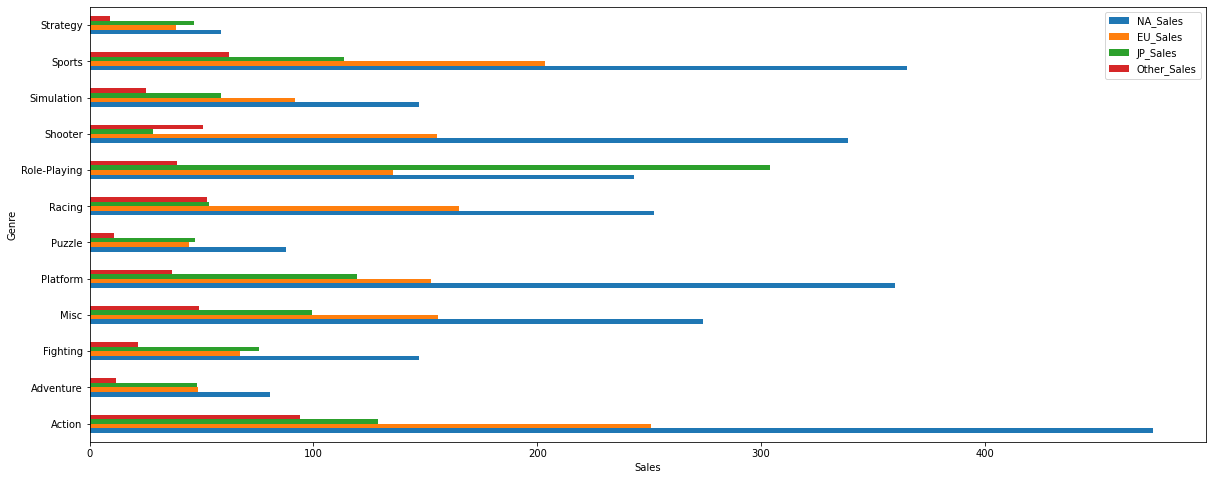

In [37]:
#전체 지역별 장르 선호도
df1 = df.drop(['Year'], axis=1)
df1.groupby("Genre").sum()

plt.rcParams["figure.figsize"] = (20,8)
compare_plot = df1.groupby("Genre").sum().plot(kind='barh')
compare_plot.set_xlabel("Sales")
compare_plot.set_ylabel("Genre")

Text(0, 0.5, 'Genre')

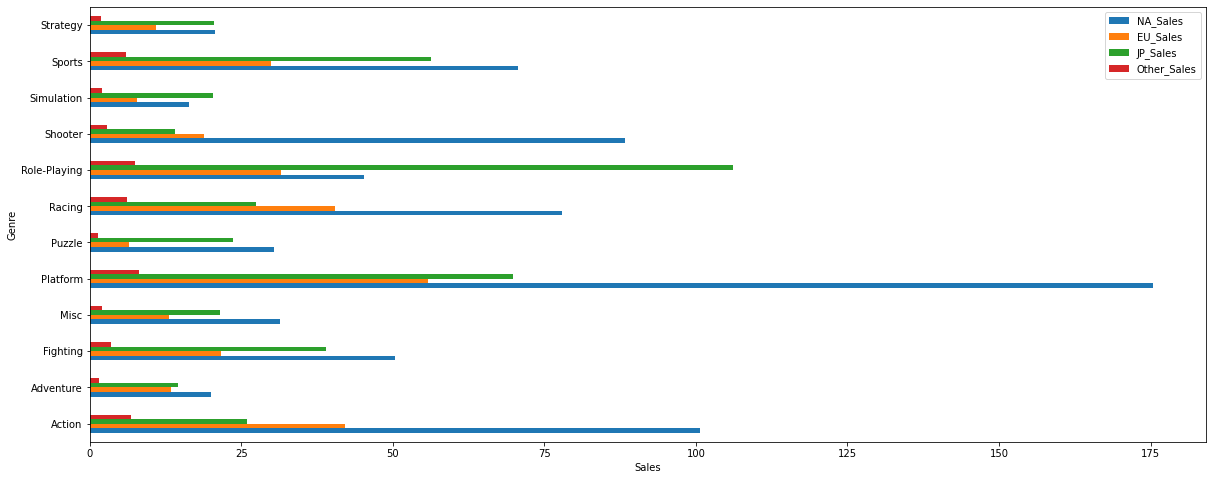

In [38]:
#1900년대 선호 장르
df_year1 = df
df_year1 = df_year1[df_year1['Year'].between(1977, 1999)]
df_year1 = df_year1.drop(['Year'], axis=1)
region_year1_plot = df_year1.groupby("Genre").sum().plot(kind='barh')
region_year1_plot.set_xlabel("Sales")
region_year1_plot.set_ylabel("Genre")

Text(0, 0.5, 'Genre')

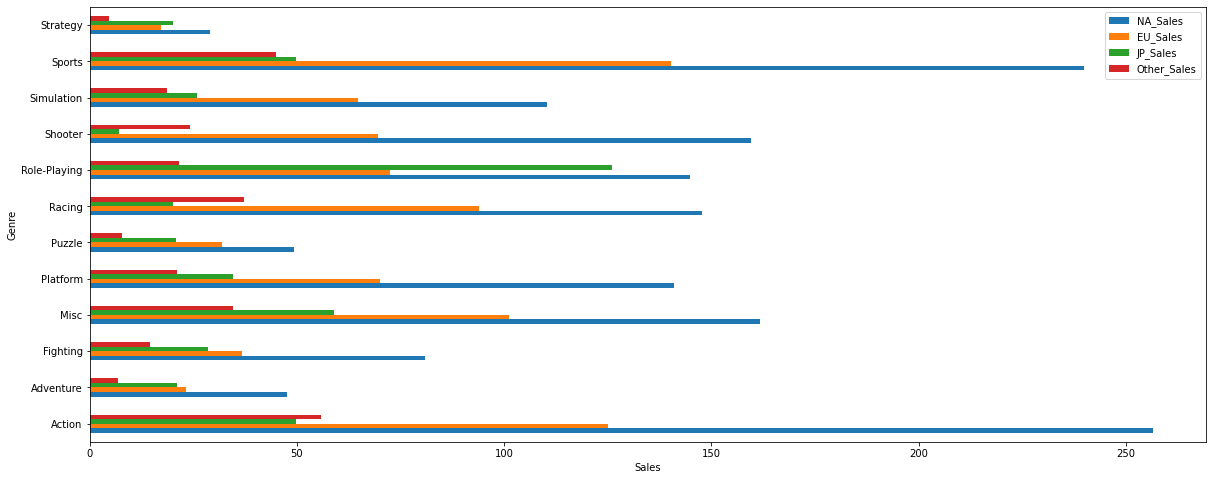

In [39]:
#2000년대 선호 장르
df_year2 = df
df_year2 = df_year2[df_year2['Year'].between(2000, 2009)]
df_year2 = df_year2.drop(['Year'], axis=1)
region_year2_plot = df_year2.groupby("Genre").sum().plot(kind='barh')
region_year2_plot.set_xlabel("Sales")
region_year2_plot.set_ylabel("Genre")

Text(0, 0.5, 'Genre')

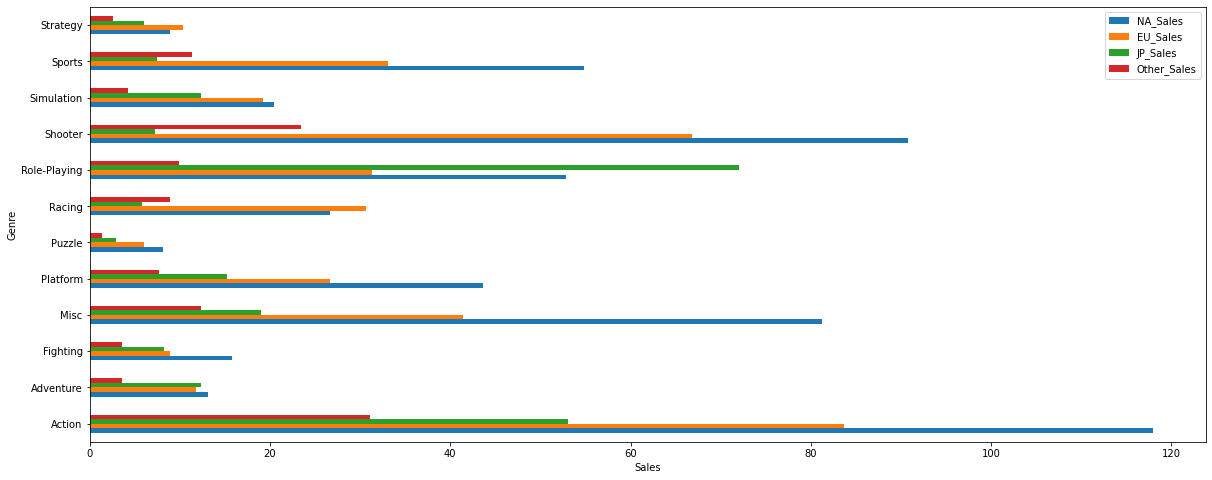

In [40]:
#2010년대 선호 장르
df_year3 = df
df_year3 = df_year3[df_year3['Year'].between(2010, 2020)]
df_year3 = df_year3.drop(['Year'], axis=1)
region_year3_plot = df_year3.groupby("Genre").sum().plot(kind='barh')
region_year3_plot.set_xlabel("Sales")
region_year3_plot.set_ylabel("Genre")

In [41]:
#지역별 장르 평균 매출 
NA_Sales_Mean = (df.groupby(['Genre'], as_index=False).mean()
            .groupby('Genre')['NA_Sales'].mean())
EU_Sales_Mean = (df.groupby(['Genre'], as_index=False).mean()
            .groupby('Genre')['EU_Sales'].mean())
JP_Sales_Mean = (df.groupby(['Genre'], as_index=False).mean()
            .groupby('Genre')['JP_Sales'].mean())
Other_Sales_Mean = (df.groupby(['Genre'], as_index=False).mean()
            .groupby('Genre')['Other_Sales'].mean())
Sales_Mean = pd.DataFrame([NA_Sales_Mean, EU_Sales_Mean, JP_Sales_Mean, Other_Sales_Mean])
Sales_Mean = Sales_Mean.T
Sales_Mean

NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Action        0.250512  0.132331  0.067969     0.049451
Adventure     0.077988  0.046731  0.046547     0.011431
Fighting      0.243659  0.111209  0.125315     0.035927
Misc          0.213289  0.121151  0.077302     0.038025
Platform      0.621813  0.263161  0.206494     0.063644
Puzzle        0.180679  0.091379  0.097243     0.022058
Racing        0.332625  0.217744  0.070303     0.068865
Role-Playing  0.201517  0.112206  0.252164     0.032222
Shooter       0.421731  0.193412  0.035442     0.063088
Simulation    0.205489  0.128380  0.081885     0.034832
Sports        0.267337  0.148698  0.083094     0.045479
Strategy      0.101774  0.066730  0.080974     0.015896

Text(0, 0.5, 'Genre')

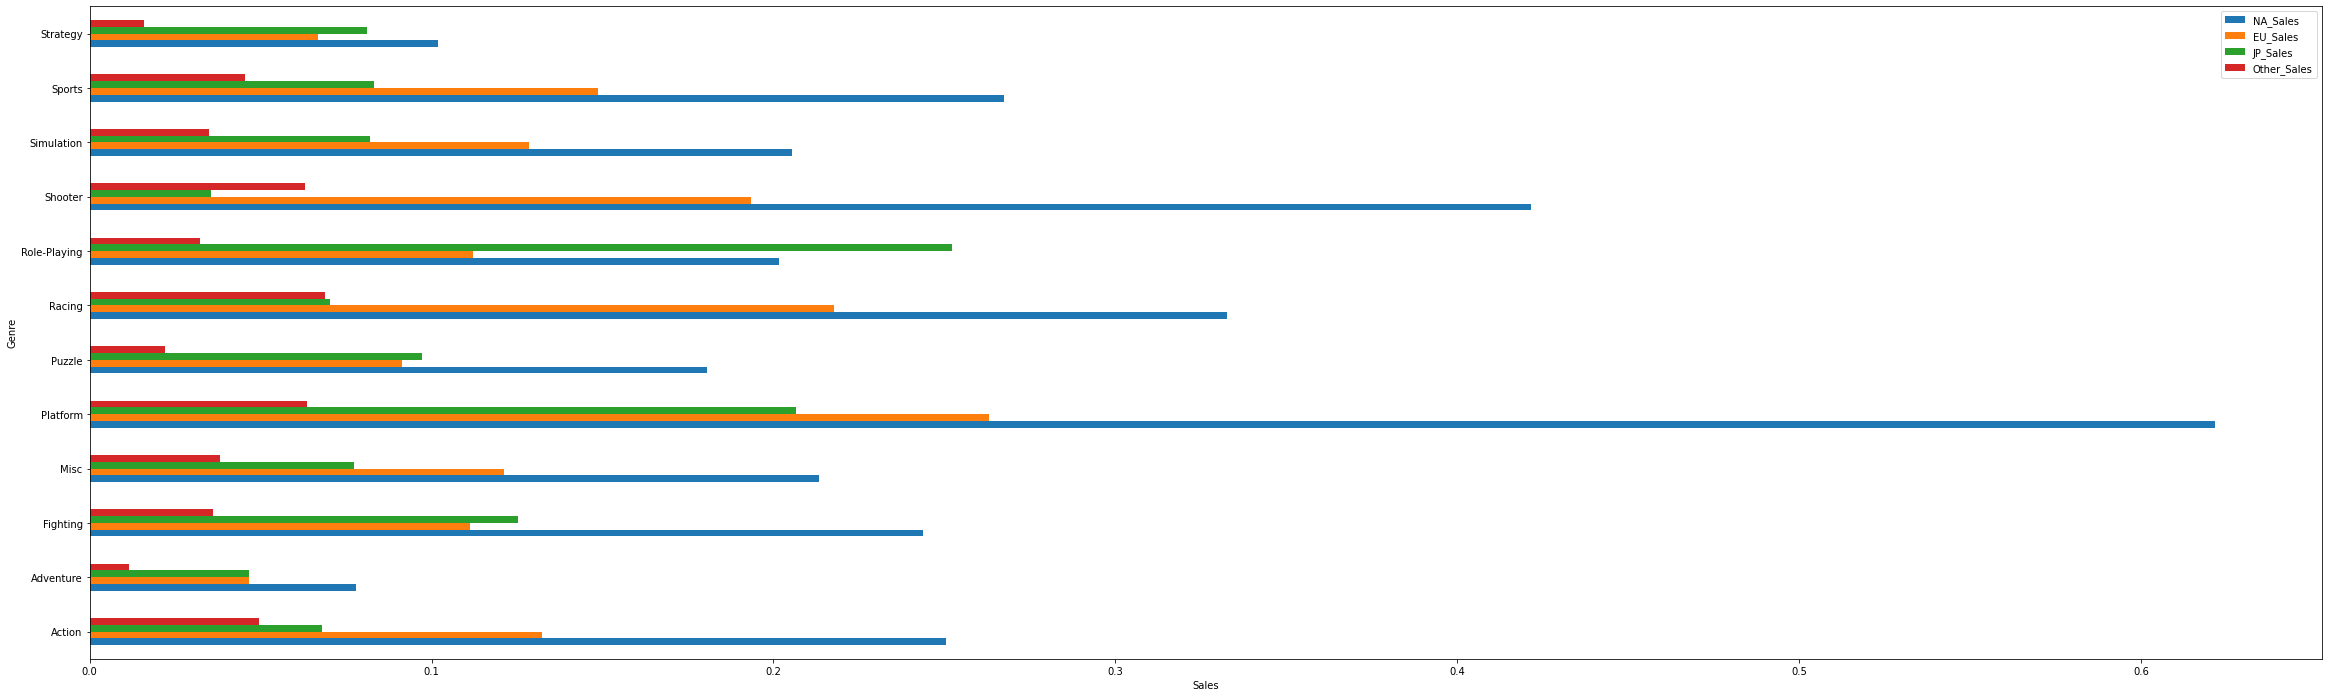

In [42]:
#시각화 그래프 사이즈 조정
plt.rcParams["figure.figsize"] = (40,12)

#Sales 전체 평균 그래프
compare_plot = Sales_Mean.plot(kind='barh')
compare_plot.set_xlabel("Sales")
compare_plot.set_ylabel("Genre")

2. 연도별 게임(장르)의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.

In [43]:
df2 = df.copy()
list_of_my_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
df2['Total_Sales'] = df[list_of_my_columns].sum(axis=1)
df2['Year'] = df2['Year'].astype(int)
df2.head()

Name Publisher Platform  ...  JP_Sales Other_Sales  Total_Sales
102  Air-Sea Battle     Atari     2600  ...       0.0        0.01         0.98
103        Indy 500     Atari     2600  ...       0.0        0.00         0.27
104          Combat     Atari     2600  ...       0.0        0.01         1.25
105        Home Run     Atari     2600  ...       0.0        0.00         0.15
106  Super Breakout     Atari     2600  ...       0.0        0.00         0.44

[5 rows x 10 columns]

In [44]:
cross_df2 = pd.crosstab(df2.Genre, df2.Year)
cross_df = cross_df2.T
cross_df['Top'] = cross_df.idxmax(axis=1)
cross_df['Count'] = cross_df.max(axis=1)
cross_df = cross_df.reset_index()
cross_df.head()

Genre  Year  Action  Adventure  Fighting  ...  Sports  Strategy     Top  Count
0      1977       1          0         0  ...       0         0  Action      1
1      1978       1          0         0  ...       1         0  Puzzle      2
2      1979       1          0         0  ...       0         0  Action      1
3      1980       3          1         1  ...       1         0    Misc      4
4      1981      25          0         0  ...       4         0  Action     25

[5 rows x 15 columns]

In [45]:
from scipy.stats import chi2_contingency

obs = pd.crosstab(cross_df['Year'],cross_df['Count'])
print(chi2_contingency(obs, correction = False))
print(chi2_contingency(obs, correction = True))

#귀무가설 : Year & 연도별 Top 장르가 연관이 없다
#대립가설 : Year & 연도별 Top 장르가 연관이 없다
#신뢰구간 : 95%
#pvalue: 0.272로 귀무가설 채택 연관이 없다

(1204.0, 0.27875276482109757, 1176, array([[0.11627907, 0.02325581, 0.02325581, ..., 0.02325581, 0.04651163,
        0.02325581],
       [0.11627907, 0.02325581, 0.02325581, ..., 0.02325581, 0.04651163,
        0.02325581],
       [0.11627907, 0.02325581, 0.02325581, ..., 0.02325581, 0.04651163,
        0.02325581],
       ...,
       [0.11627907, 0.02325581, 0.02325581, ..., 0.02325581, 0.04651163,
        0.02325581],
       [0.11627907, 0.02325581, 0.02325581, ..., 0.02325581, 0.04651163,
        0.02325581],
       [0.11627907, 0.02325581, 0.02325581, ..., 0.02325581, 0.04651163,
        0.02325581]]))
(1204.0, 0.27875276482109757, 1176, array([[0.11627907, 0.02325581, 0.02325581, ..., 0.02325581, 0.04651163,
        0.02325581],
       [0.11627907, 0.02325581, 0.02325581, ..., 0.02325581, 0.04651163,
        0.02325581],
       [0.11627907, 0.02325581, 0.02325581, ..., 0.02325581, 0.04651163,
        0.02325581],
       ...,
       [0.11627907, 0.02325581, 0.02325581, ..., 0.02325

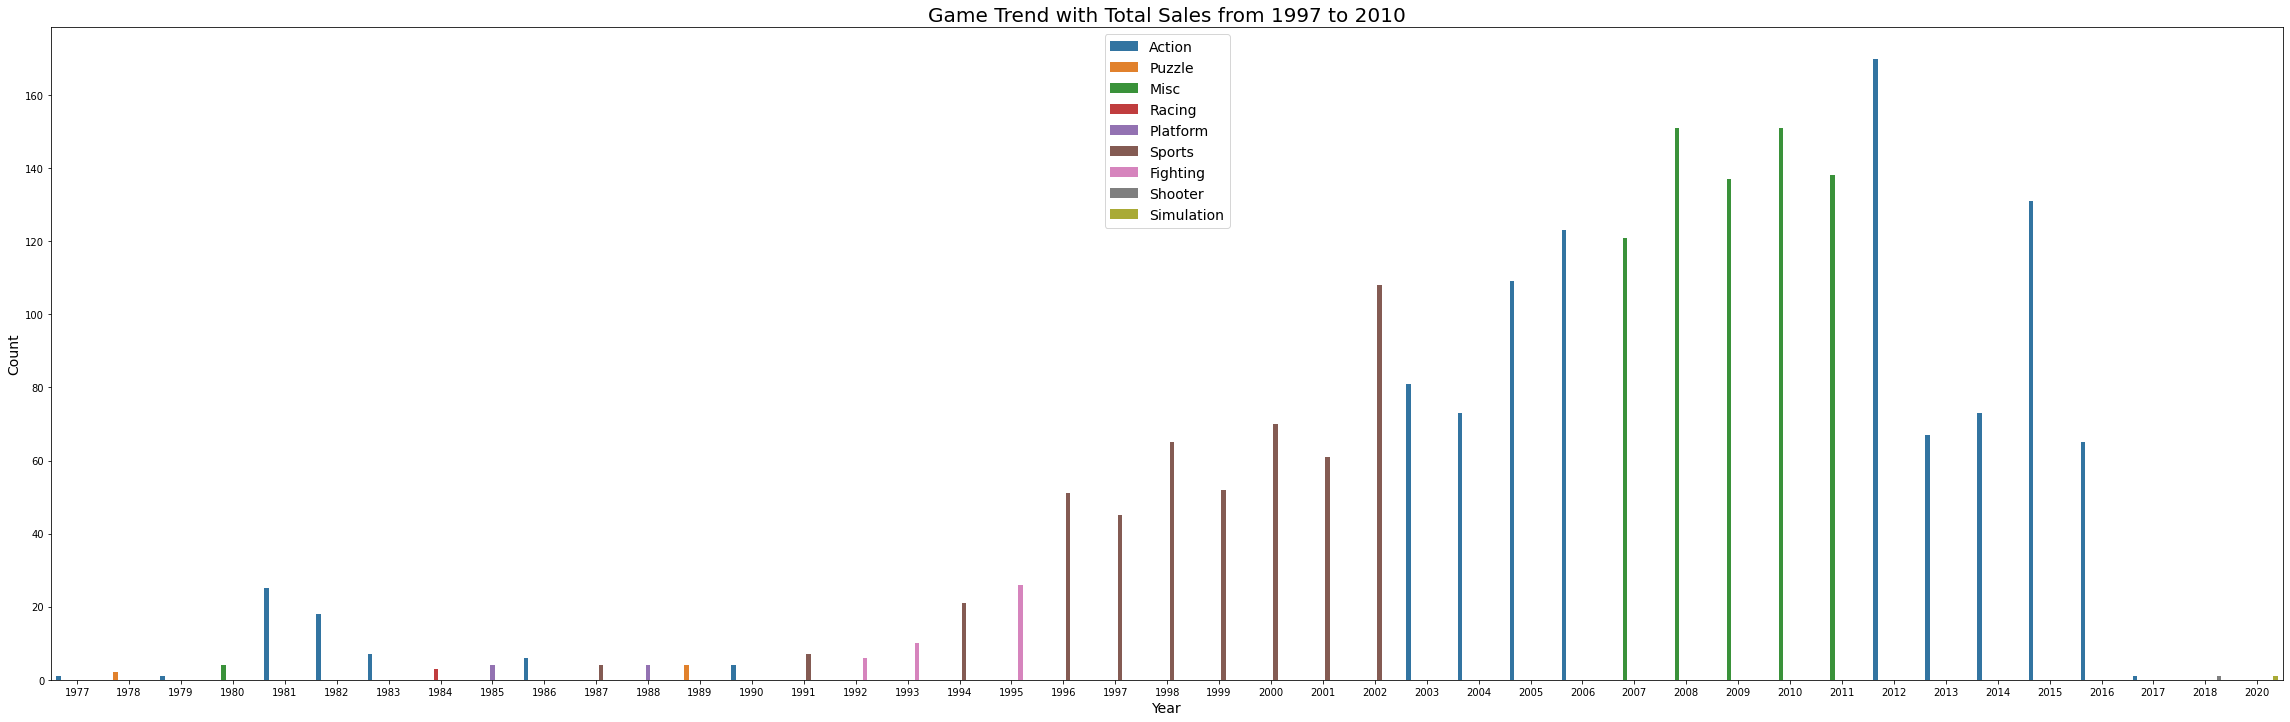

In [46]:
#연도별 출고량에 따른 게임 트렌드
import seaborn as sns
ax = sns.barplot(x='Year', 

                  y='Count', 

                  hue='Top',

                  data=cross_df)

plt.title('Game Trend with Total Sales from 1997 to 2010', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.legend(fontsize=14, loc='best')
plt.show()


3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

Text(0, 0.5, 'Platform')

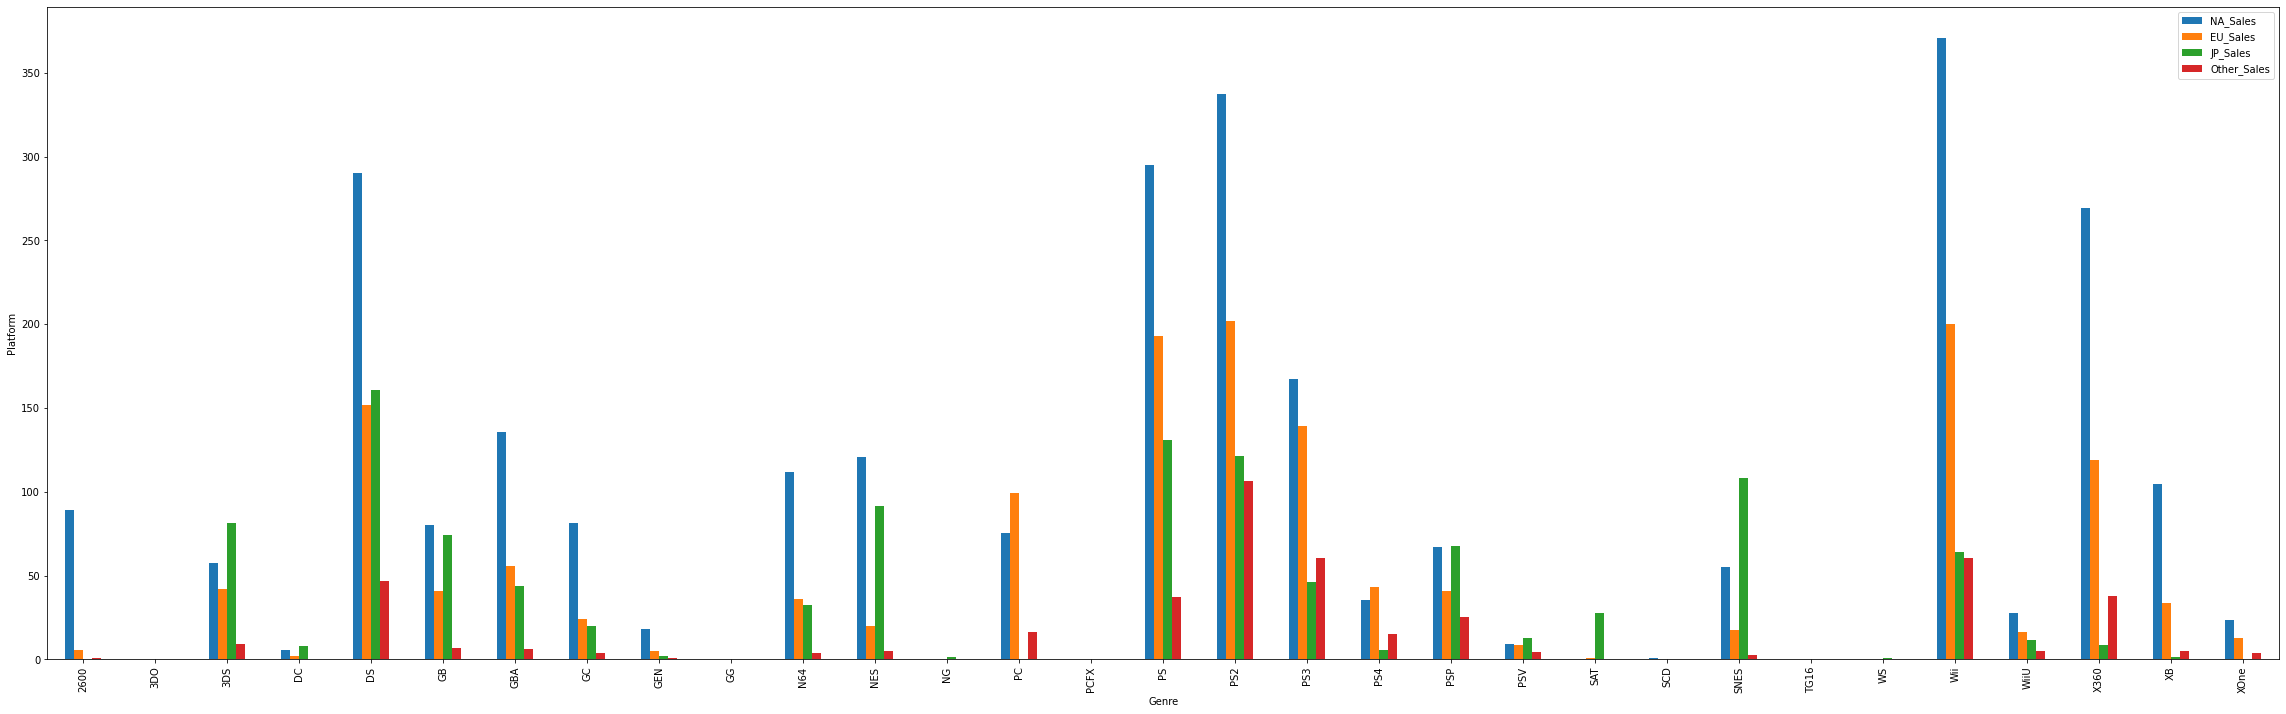

In [49]:
#3.1 플랫폼별 국가 출고량
df3 = df2.drop(['Year', 'Total_Sales'], axis=1)
df3 = df3.groupby("Platform").sum()
year_plot = df3.plot(kind='bar')
year_plot.set_xlabel("Genre")
year_plot.set_ylabel("Platform")

In [50]:
#3.2 플랫폼별 게임 출고량
df3 = df2[['Platform', 'Total_Sales']]
df3 = df3.groupby("Platform").sum()
df3.head()


Total_Sales
Platform             
2600            95.56
3DO              0.10
3DS            189.80
DC              15.37
DS             649.65

Text(0, 0.5, 'Sales')

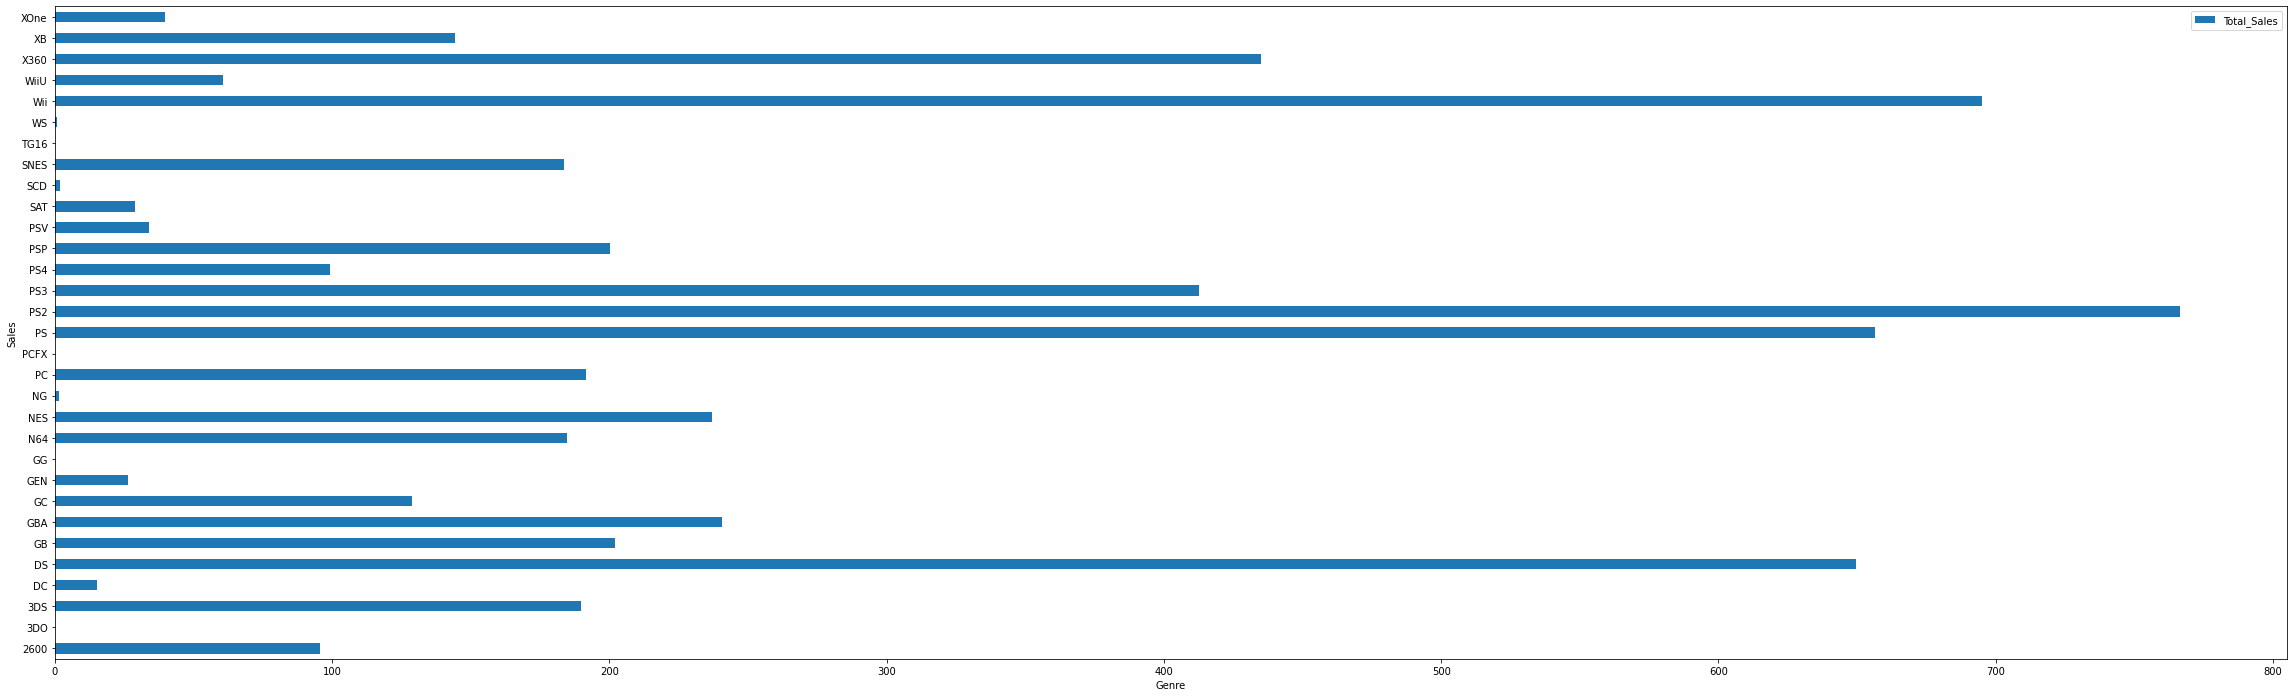

In [51]:
year_plot = df3.plot(kind='barh')
year_plot.set_xlabel("Genre")
year_plot.set_ylabel("Sales")

In [158]:
#3.3 Top 100 1900년도 게임
df_sort = df2.sort_values(['Total_Sales'], ascending=False)
df_sort1 = df_sort[['Name','Genre','Publisher','Platform','Year','Total_Sales']]
df_sort1 = df_sort1[df_sort1['Year'].between(1977, 1999)]
df_sort1 = df_sort1.drop(['Year'], axis=1)
top1 = df_sort1.iloc[:100]

Text(0, 0.5, 'Genre')

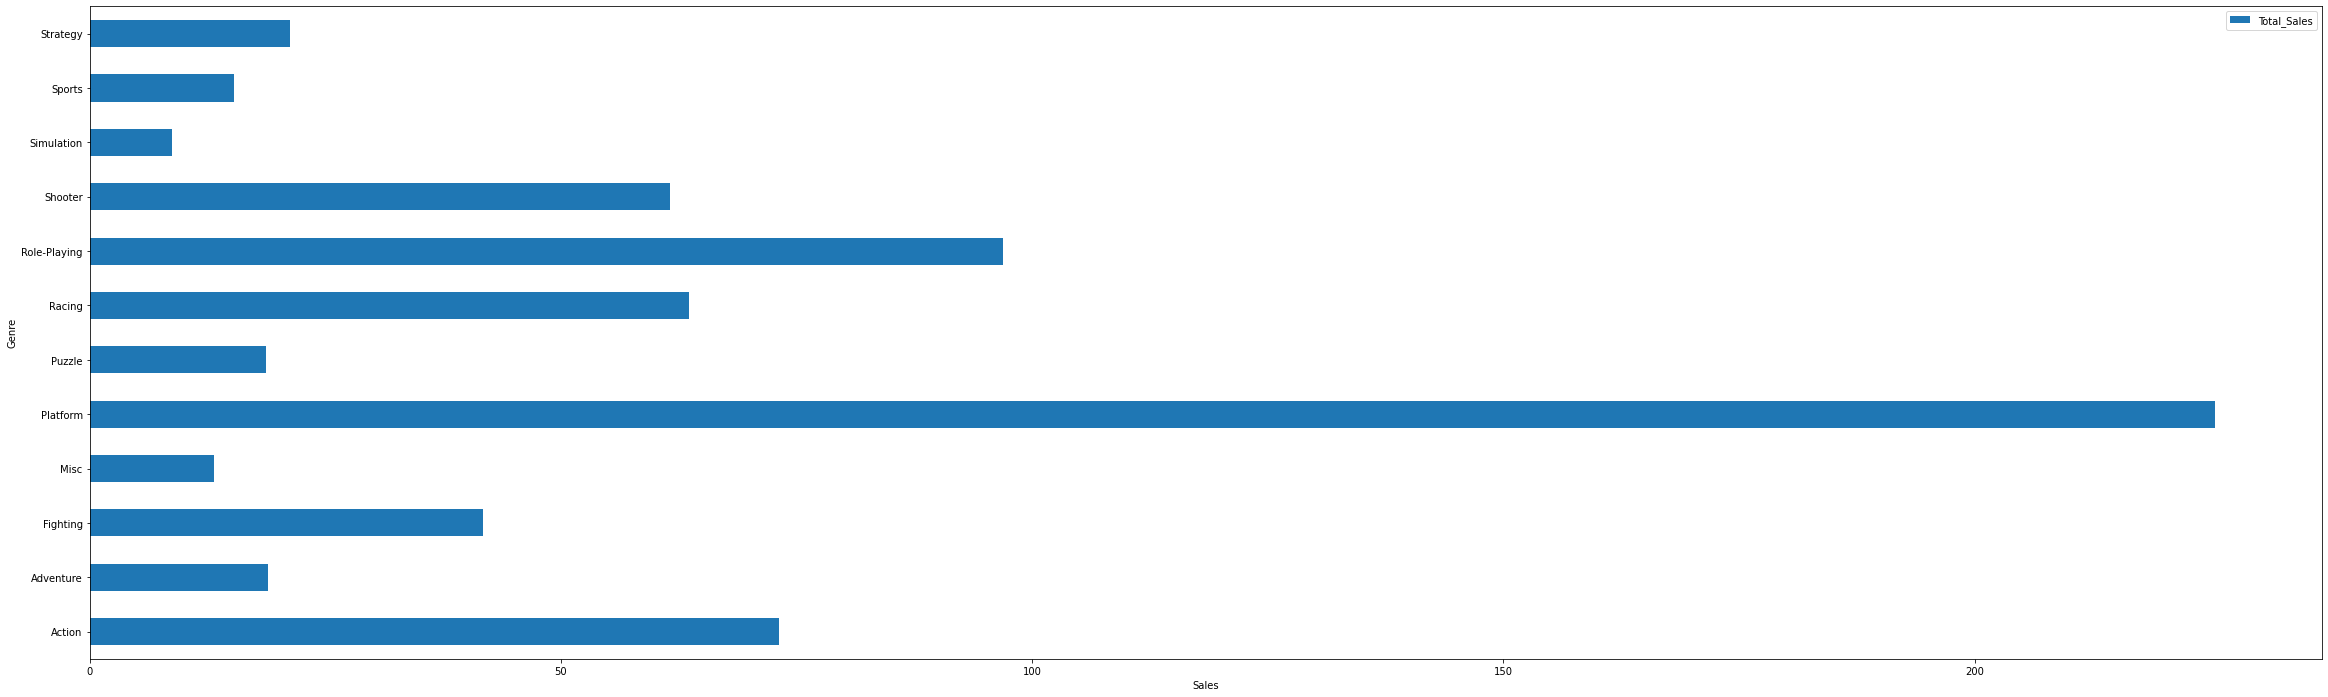

In [159]:
#장르별 시각화
top1_plot = top1.groupby("Genre").sum().plot(kind='barh')
top1_plot.set_xlabel("Sales")
top1_plot.set_ylabel("Genre")

Text(0, 0.5, 'Platform')

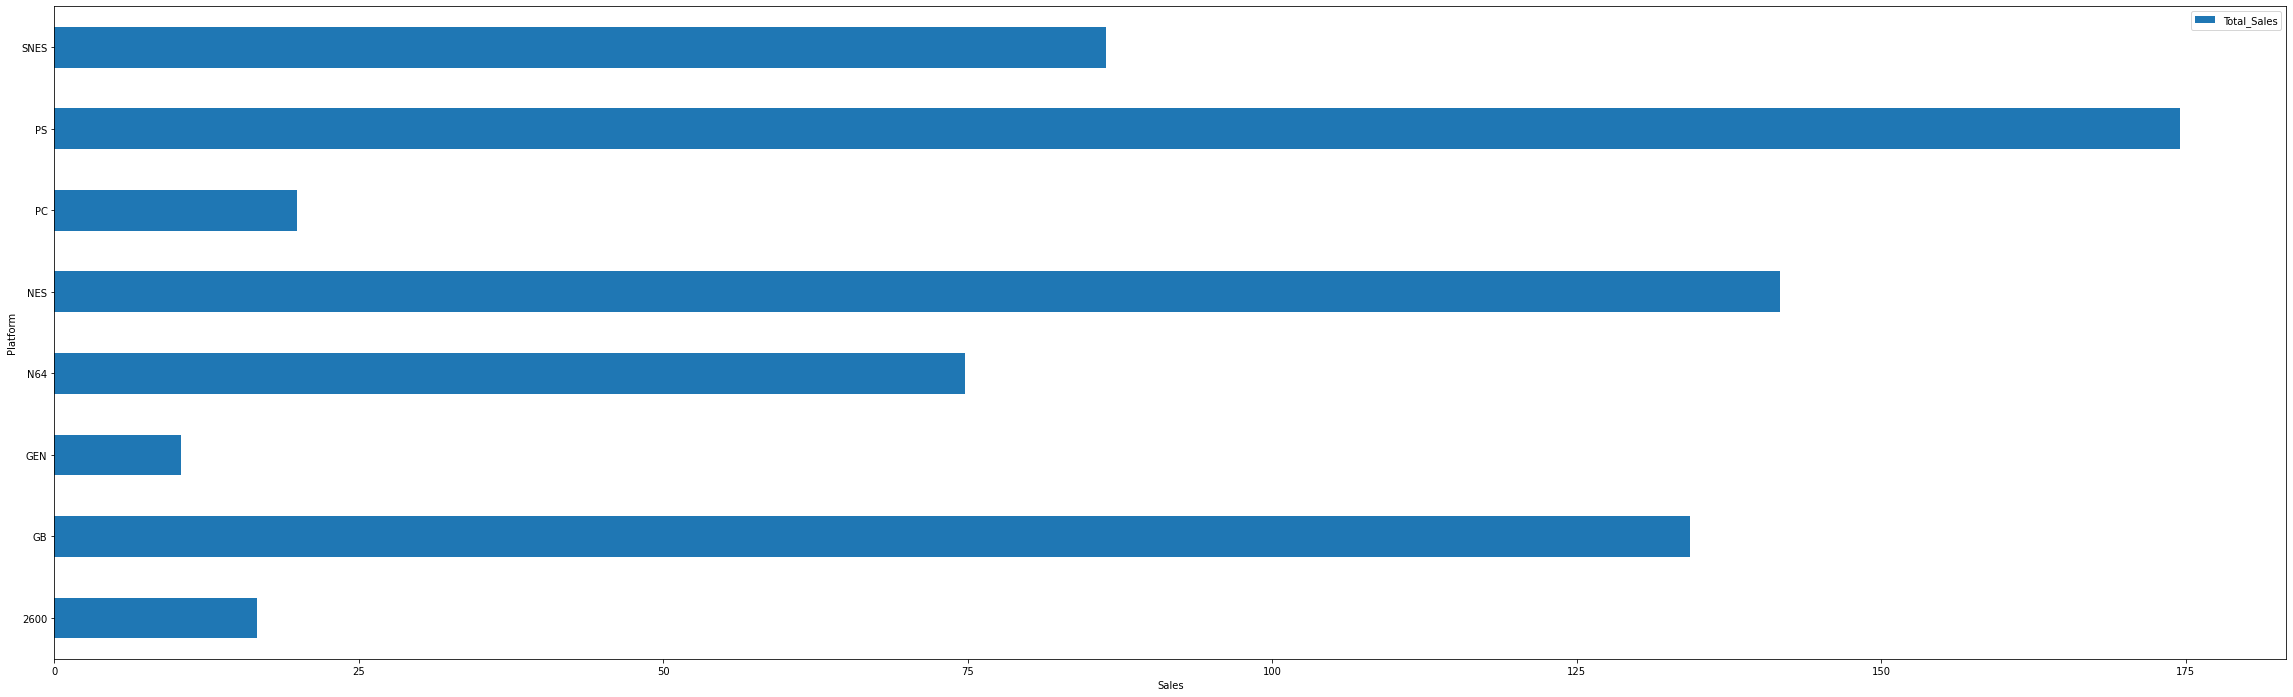

In [160]:
#플랫폼별 시각화
top1_plot = top1.groupby("Platform").sum().plot(kind='barh')
top1_plot.set_xlabel("Sales")
top1_plot.set_ylabel("Platform")

In [161]:
#3.4 Top 100 2000년도 Top 100 게임
df_sort = df2.sort_values(['Total_Sales'], ascending=False)
df_sort2 = df_sort[['Name','Genre','Publisher','Platform','Year','Total_Sales']]
df_sort2 = df_sort2[df_sort2['Year'].between(2000, 2009)]
df_sort2 = df_sort2.drop(['Year'], axis=1)
top2 = df_sort2.iloc[:100]

Text(0, 0.5, 'Genre')

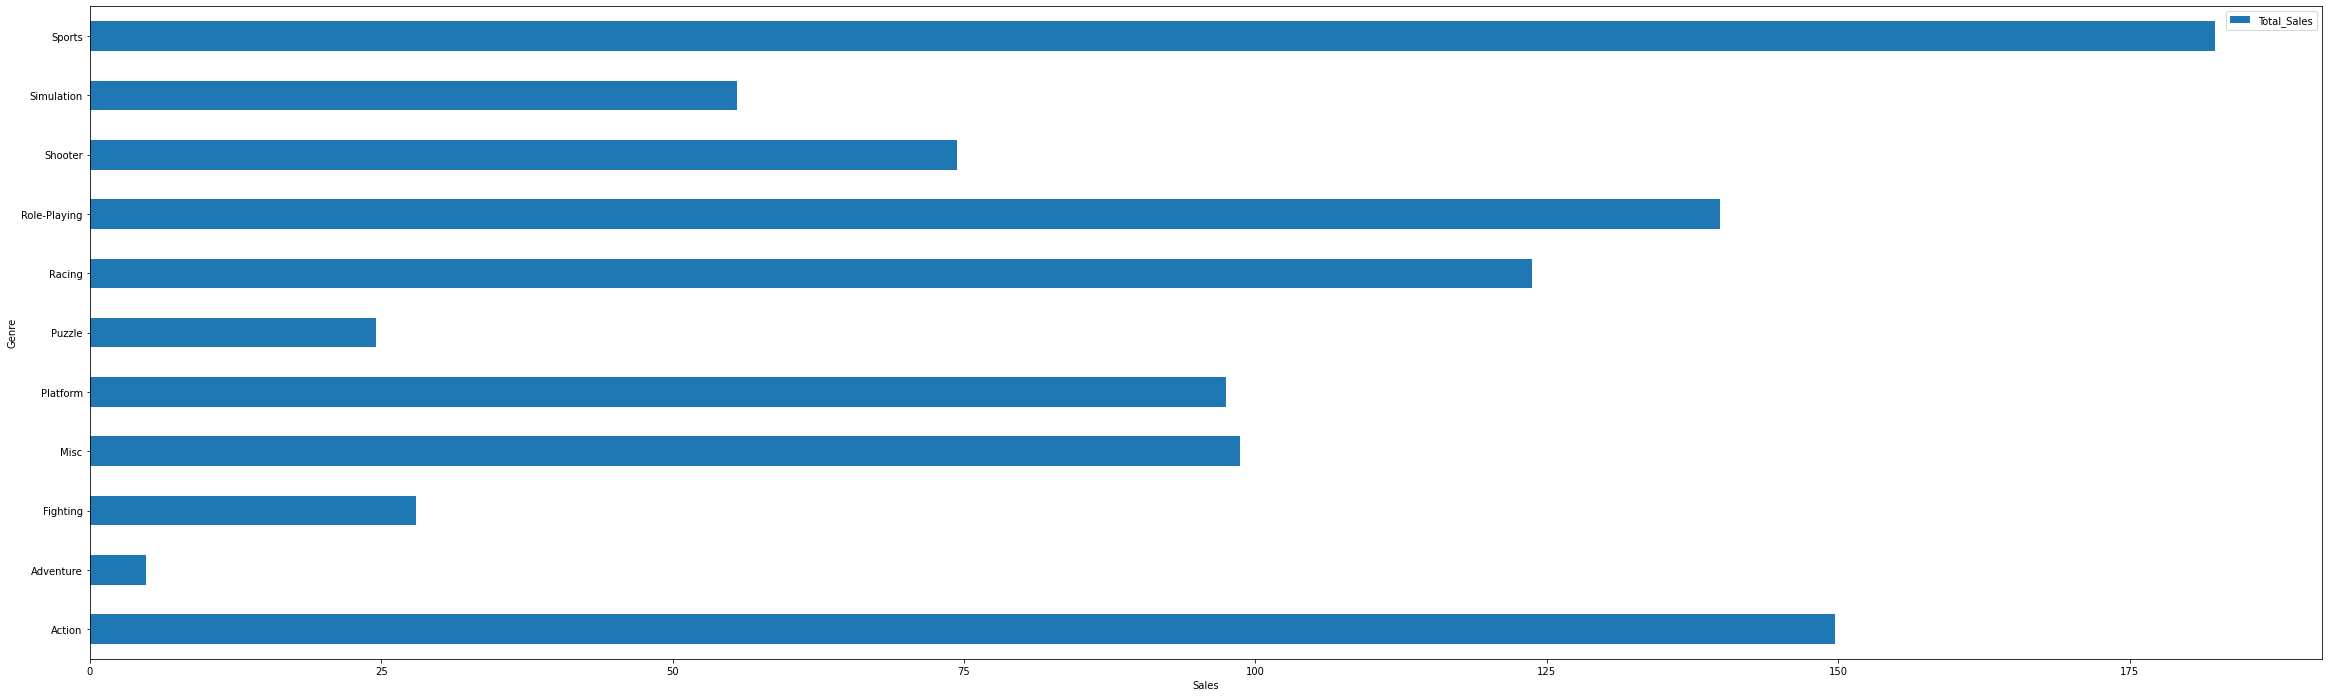

In [162]:
#장르별 시각화
top2_plot = top2.groupby("Genre").sum().plot(kind='barh')
top2_plot.set_xlabel("Sales")
top2_plot.set_ylabel("Genre")

Text(0, 0.5, 'Platform')

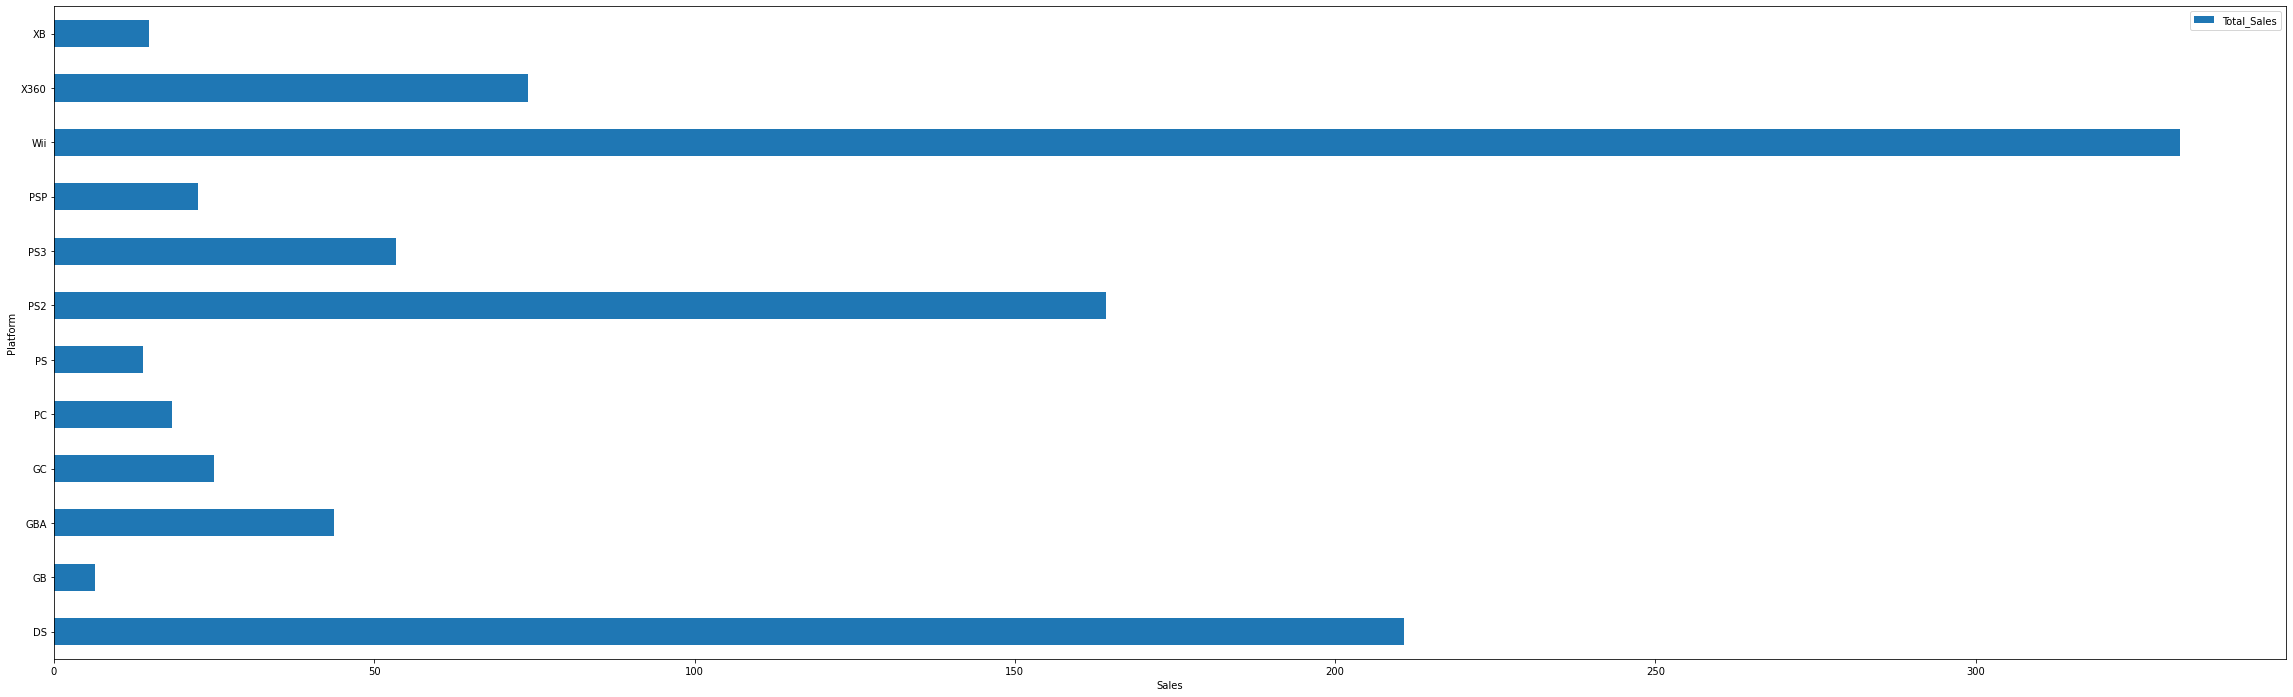

In [163]:
#플랫폼별 시각화
top2_plot = top2.groupby("Platform").sum().plot(kind='barh')
top2_plot.set_xlabel("Sales")
top2_plot.set_ylabel("Platform")

In [164]:
#3.4 Top 100 2010년도 게임
df_sort = df2.sort_values(['Total_Sales'], ascending=False)
df_sort3 = df_sort[['Name','Genre','Publisher','Platform','Year','Total_Sales']]
df_sort3 = df_sort3[df_sort3['Year'].between(2010, 2020)]
df_sort3 = df_sort3.drop(['Year'], axis=1)
top3 = df_sort3.iloc[:100]

Text(0, 0.5, 'Genre')

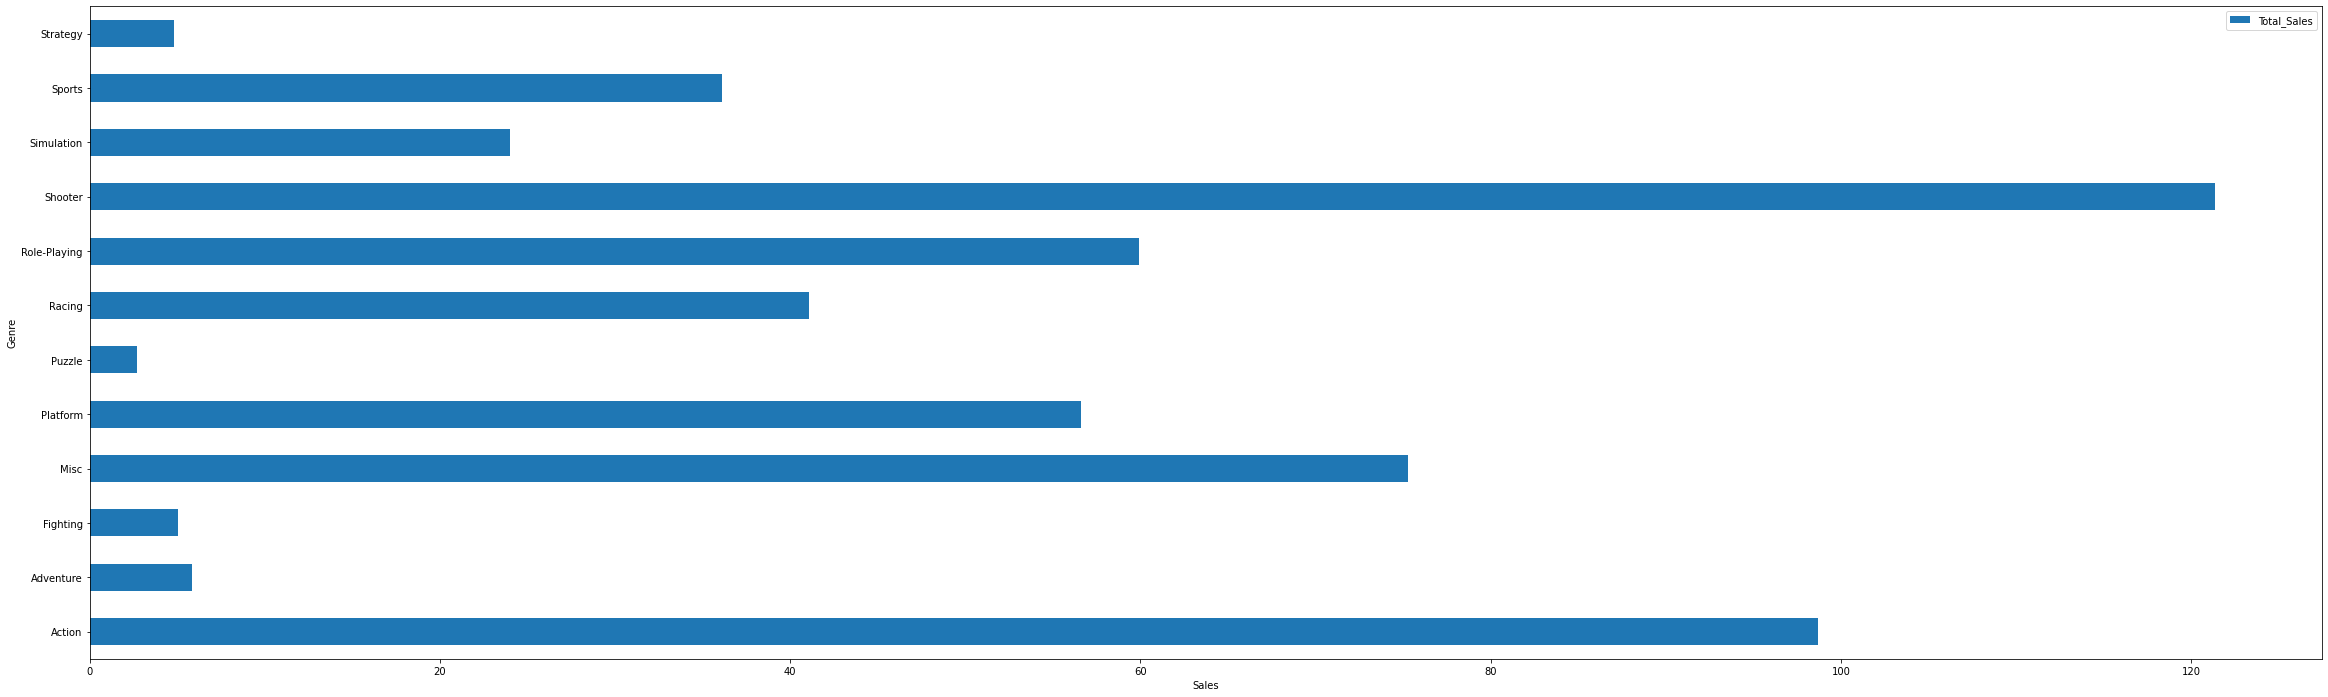

In [165]:
#장르별 시각화
top3_plot = top3.groupby("Genre").sum().plot(kind='barh')
top3_plot.set_xlabel("Sales")
top3_plot.set_ylabel("Genre")

Text(0, 0.5, 'Platform')

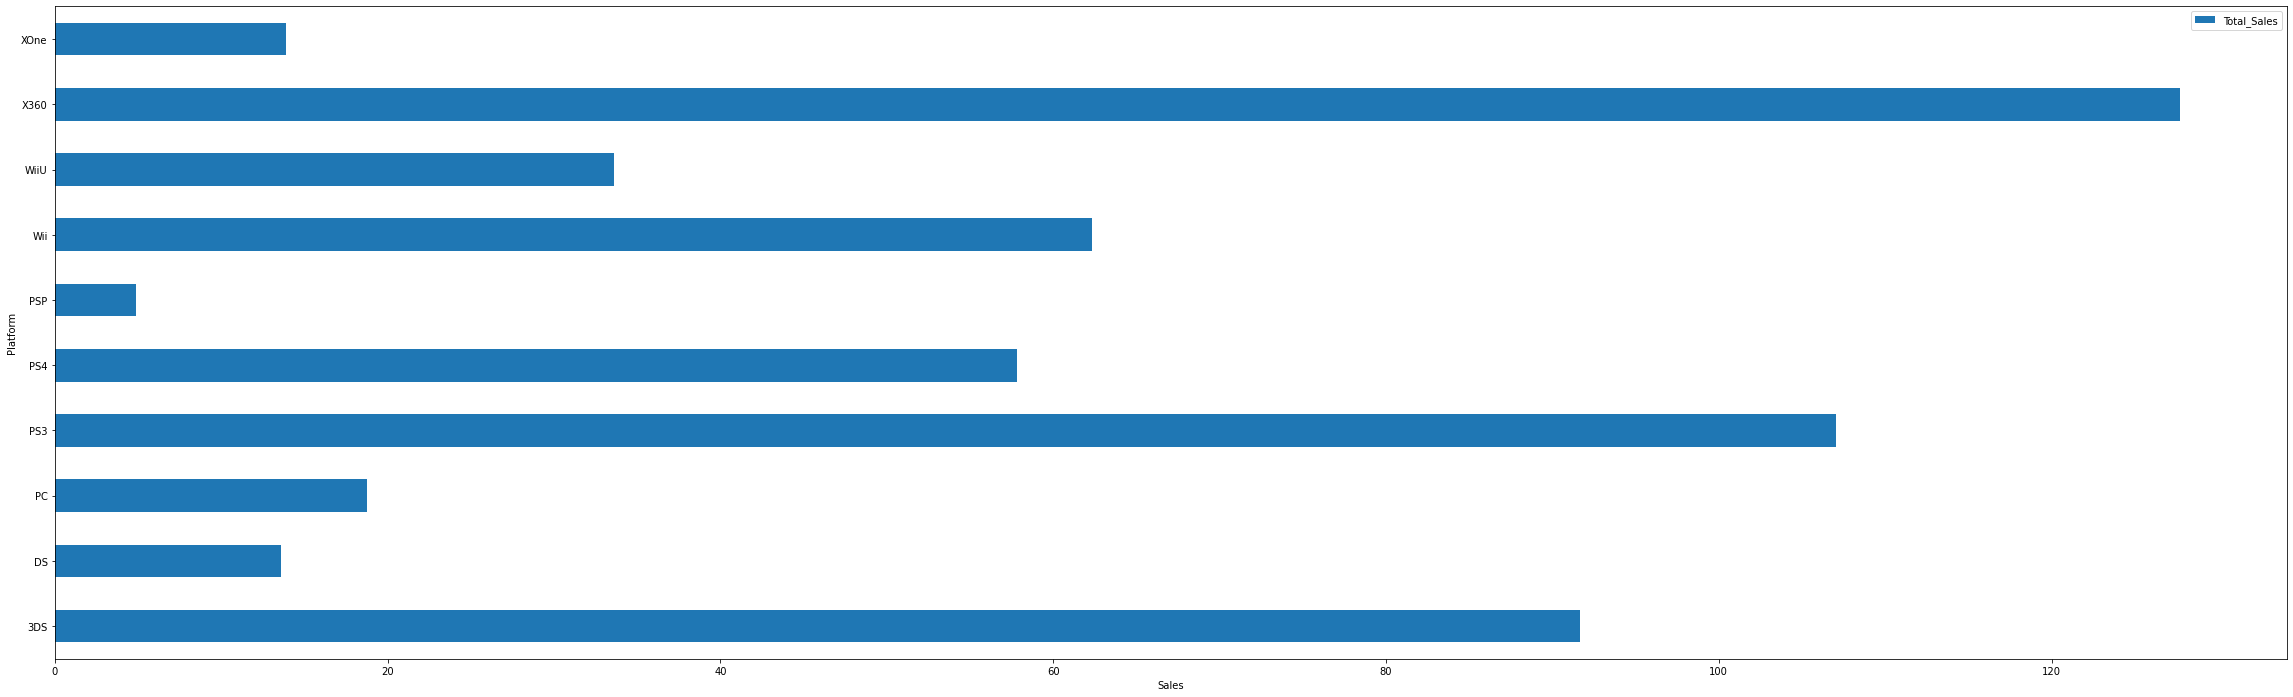

In [167]:
#플랫폼별 시각화
top3_plot = top3.groupby("Platform").sum().plot(kind='barh')
top3_plot.set_xlabel("Sales")
top3_plot.set_ylabel("Platform")

In [168]:
#플랫폼별 Sales 변화
pd_sort1 = df_sort1.groupby("Platform").sum()
pd_sort2 = df_sort2.groupby("Platform").sum()
pd_sort3 = df_sort3.groupby("Platform").sum()
platform_sort = pd_sort2.copy()
platform_sort = platform_sort.drop(['Total_Sales'], axis=1)
platform_sort['Total_Sales1'] = (pd_sort1['Total_Sales'])
platform_sort['Total_Sales2'] = (pd_sort2['Total_Sales'])
platform_sort['Total_Sales3'] = (pd_sort3['Total_Sales'])
platform_sort['Change1'] = (pd_sort2['Total_Sales'] - pd_sort1['Total_Sales'])
platform_sort['Change2'] = (pd_sort3['Total_Sales'] - pd_sort2['Total_Sales'])
platform_sort

Total_Sales1  Total_Sales2  Total_Sales3  Change1  Change2
Platform                                                            
DC                8.21          7.16           NaN    -1.05      NaN
DS                0.02        569.08         80.55   569.06  -488.53
GB              179.38         22.66           NaN  -156.72      NaN
GBA               0.11        240.46           NaN   240.35      NaN
GC                0.28        128.69           NaN   128.41      NaN
N64             156.18         28.65           NaN  -127.53      NaN
PC               45.72         71.36         74.40    25.64     3.04
PS              542.12        114.34           NaN  -427.78      NaN
PS2               0.17        764.49          1.94   764.32  -762.55
PS3               0.17        163.73        248.94   163.56    85.21
PSP                NaN        154.13         46.29      NaN  -107.84
PSV                NaN          0.30         33.87      NaN    33.57
WS                0.46          0.20           NaN    -0.26      NaN
Wii               0.05        556.44        138.54   556.39  -417.90
X360               NaN        202.93        232.00      NaN    29.07
XB                 NaN        144.24          0.06      NaN  -144.18

In [136]:
#장르별 Sales 변화
gd_sort1 = df_sort1.groupby("Genre").sum()
gd_sort2 = df_sort2.groupby("Genre").sum()
gd_sort3 = df_sort3.groupby("Genre").sum()
genre_sort = d_sort2.copy()
genre_sort = genre_sort.drop(['Total_Sales'], axis=1)
genre_sort['Total_Sales1'] = (gd_sort1['Total_Sales'])
genre_sort['Total_Sales2'] = (gd_sort2['Total_Sales'])
genre_sort['Total_Sales3'] = (gd_sort3['Total_Sales'])
genre_sort['Change1'] = (gd_sort2['Total_Sales'] - gd_sort1['Total_Sales'])
genre_sort['Change2'] = (gd_sort3['Total_Sales'] - gd_sort2['Total_Sales'])
genre_sort

Total_Sales1  Total_Sales2  Total_Sales3  Change1  Change2
Genre                                                                   
Action              175.45        487.14        285.91   311.69  -201.23
Adventure            49.44         98.60         40.87    49.16   -57.73
Fighting            114.57        160.68         36.48    46.11  -124.20
Misc                 68.03        356.33        154.04   288.30  -202.29
Platform            308.98        266.70         93.13   -42.28  -173.57
Puzzle               61.92        109.86         18.42    47.94   -91.44
Racing              151.86        298.80         72.01   146.94  -226.79
Role-Playing        190.44        364.83        166.05   174.39  -198.78
Shooter             124.07        260.69        188.32   136.62   -72.37
Simulation           46.56        219.76         56.30   173.20  -163.46
Sports              162.91        474.67        106.90   311.76  -367.77
Strategy             53.90         70.80         27.89    16.90   -42.91

In [ ]:
######## 궁금증 테스트 (cluster이 될까)
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df1_sort = df2.drop((['Total_Sales']), axis =1)
#Label로 지정
publisher_label = df1_sort['Publisher']
platform_label = df1_sort['Platform']
genre_label = df1_sort['Genre']

#숫자 데이터
number = df1_sort[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

#정규화
scaler = StandardScaler()
scaler.fit(number)
number = scaler.transform(number)
number


In [ ]:
#Elbow methods
sum_of_sqd = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(number)
    sum_of_sqd.append(km.inertia_)

plt.plot(K, sum_of_sqd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
k2_means = KMeans(n_clusters=2, random_state=42)
k2_means.fit(number)
clusters = k2_means.labels_
series = pd.Series(clusters)
series

In [ ]:
pca = PCA(n_components = 2)
pc = pca.fit_transform(number)
final_df = pd.DataFrame(data = pc, columns = ['PC1','PC2'])
final_df['Cluster'] = series
final_df

In [ ]:
label_df = pd.DataFrame(data = pc, columns = ['PC1', 'PC2'])
label_df['Publisher'] = pd.Series(publisher_label)
label_df

In [ ]:
sns.scatterplot(data = label_df ,x='PC1',y='PC2', hue='Publisher')
plt.title('Diagnosis Labeled')
plt.show()